In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Preprocessing

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')
print(data.shape)
data.head()

(690, 16)


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
#checking data hygiene
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB
None


In [4]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values
print(X.shape)
print(y.shape)

(690, 15)
(690,)


In [5]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [6]:
print(X[0,:])

[0.84268147 1.         0.12526316 0.40928571 0.5        0.23076923
 0.375      0.05561404 0.         0.         0.         1.
 0.5        0.05       0.01212   ]


#### Self Organizing Maps from minisom library

In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y =10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

In [8]:
from pylab import bone, pcolor, colorbar, plot, show

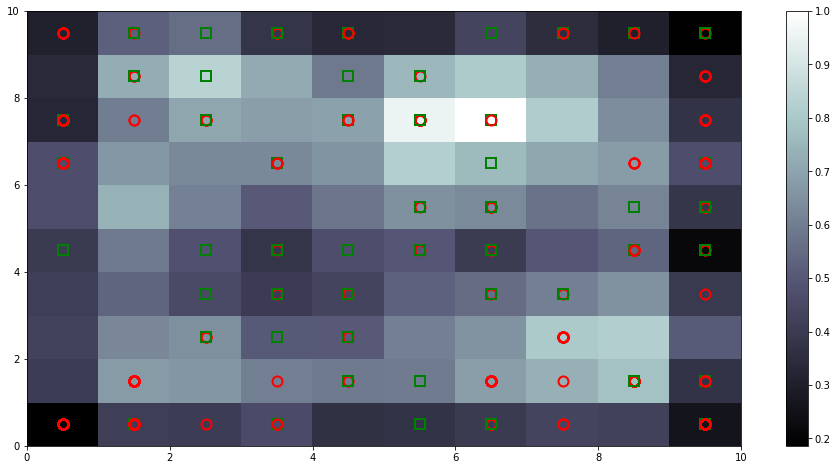

In [9]:
plt.figure(figsize=(16,8))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.show()

In [10]:
#concatenating Potential Fraud cells
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,7)], mappings[(6,7)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [11]:
#getting Potential Fraud Customer IDs in DataFrame
frauds_df= pd.DataFrame(data=frauds, columns=data.iloc[:,0:-1].columns)
frauds_df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15651868.0,0.0,38.75,1.50,2.0,1.0,1.0,0.00,0.0,0.0,0.0,0.0,2.0,76.0,1.0
1,15716082.0,0.0,22.25,1.25,1.0,1.0,1.0,3.25,0.0,0.0,0.0,0.0,2.0,280.0,1.0
2,15772329.0,0.0,28.08,15.00,1.0,10.0,9.0,0.00,1.0,0.0,0.0,0.0,2.0,0.0,13213.0
3,15734649.0,0.0,40.83,10.00,2.0,11.0,8.0,1.75,1.0,0.0,0.0,0.0,2.0,29.0,838.0
4,15672637.0,0.0,36.75,4.71,2.0,1.0,1.0,0.00,0.0,0.0,0.0,0.0,2.0,160.0,1.0
